# Feedforward Neural Network with Backpropagation
This notebook demonstrates a simple feedforward neural network built from scratch using NumPy. It includes forward propagation, loss calculation, backpropagation, and weight updates. Mathematical expressions are provided in LaTeX for clarity.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from rich import print
np.random.seed(1)

## Step 1: Setup Input and Output

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

## Step 2: Activation Function and its Derivative

We use the sigmoid function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

And its derivative:

$$
\sigma'(a) = a(1 - a)
$$

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

## Step 3: Initialize Parameters

In [6]:
input_dim = 2
hidden_dim = 4
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

In [8]:
b1

array([[0., 0., 0., 0.]])

## Step 4: Forward Propagation

Compute the activations:

$$
Z^{[1]} = XW^{[1]} + b^{[1]} \\
A^{[1]} = \sigma(Z^{[1]}) \\
Z^{[2]} = A^{[1]}W^{[2]} + b^{[2]} \\
A^{[2]} = \sigma(Z^{[2]})
$$

In [11]:
Z1 = np.dot(X, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)

print("Output after forward pass:\n", A2)

Output after forward pass:
 [[0.43433595]
 [0.68796372]
 [0.54888958]
 [0.75509485]]

## Step 5: Compute Loss

Binary cross-entropy loss:

$$
\mathcal{L} = - \frac{1}{m} \sum \left[Y \log(A^{[2]}) + (1 - Y) \log(1 - A^{[2]})\right]
$$

In [12]:
m = Y.shape[0]
loss = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
print("Initial Loss:", loss)

Initial Loss: 0.737629097060664

## Step 6: Backpropagation

Gradients for output and hidden layers:

$$
dZ^{[2]} = A^{[2]} - Y \\
dW^{[2]} = \frac{1}{m} A^{[1]T} dZ^{[2]} \\
db^{[2]} = \frac{1}{m} \sum dZ^{[2]} \\
dA^{[1]} = dZ^{[2]} W^{[2]T} \\
dZ^{[1]} = dA^{[1]} * \sigma'(Z^{[1]}) \\
dW^{[1]} = \frac{1}{m} X^T dZ^{[1]} \\
db^{[1]} = \frac{1}{m} \sum dZ^{[1]}
$$

In [13]:
dZ2 = A2 - Y
dW2 = (1/m) * np.dot(A1.T, dZ2)
db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

dA1 = np.dot(dZ2, W2.T)
dZ1 = dA1 * sigmoid_derivative(A1)
dW1 = (1/m) * np.dot(X.T, dZ1)
db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

## Step 7: Update Parameters

In [14]:
learning_rate = 0.1

W1 -= learning_rate * dW1
b1 -= learning_rate * db1
W2 -= learning_rate * dW2
b2 -= learning_rate * db2

## Step 8: Full Training Loop

In [15]:

losses = []
for i in range(10000):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    loss = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    losses.append(loss)

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")


Iteration 0: Loss = 0.7347

Iteration 1000: Loss = 0.5765

Iteration 2000: Loss = 0.4041

Iteration 3000: Loss = 0.1683

Iteration 4000: Loss = 0.0800

Iteration 5000: Loss = 0.0475

Iteration 6000: Loss = 0.0324

Iteration 7000: Loss = 0.0241

Iteration 8000: Loss = 0.0190

Iteration 9000: Loss = 0.0155

## Step 9: Final Prediction

In [16]:
print("Final Predictions:\n", A2.round())

Final Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]

## Step 10: Loss Visualization

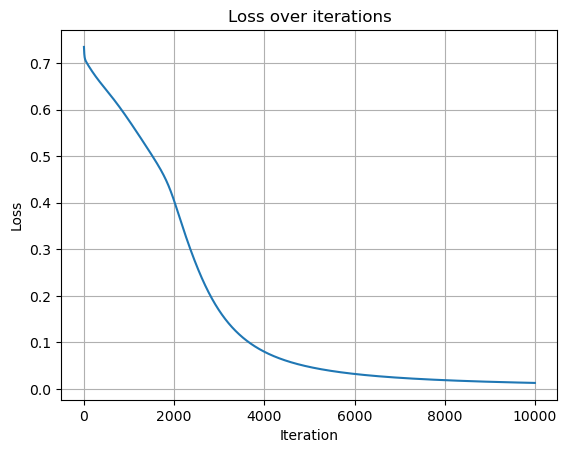

In [17]:
plt.plot(losses)
plt.title('Loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### 🧮 Backpropagation Derivative Summary with Explanations

| **Quantity** | **Meaning** | **Derived From** | **How It’s Computed** | **Why This Formula? (Explanation)** |
|--------------|-------------|------------------|------------------------|-------------------------------------|
| `dZ2` | Error at output layer | $\mathcal{L} = - \frac{1}{m} \sum \left[Y \log(A^{[2]}) + (1 - Y) \log(1 - A^{[2]})\right]$ | `A2 - Y` | From the chain rule applied to sigmoid + binary cross-entropy: <br> $\frac{\partial \mathcal{L}}{\partial Z^{[2]}} = A^{[2]} - Y$. This is a well-known simplification when using sigmoid + BCE. |
| `dW2` | Gradient w.r.t. weights from hidden to output | $Z^{[2]} = A^{[1]} \cdot W^{[2]} + b^{[2]}$ | `(1/m) * A1.T @ dZ2` | Use chain rule: $\frac{\partial \mathcal{L}}{\partial W^{[2]}} = \frac{1}{m} A^{[1]^T} \cdot dZ^{[2]}$ |
| `db2` | Gradient w.r.t. bias at output | $Z^{[2]} = A^{[1]} \cdot W^{[2]} + b^{[2]}$ | `(1/m) * np.sum(dZ2, axis=0, keepdims=True)` | $\frac{\partial \mathcal{L}}{\partial b^{[2]}} = \frac{1}{m} \sum dZ^{[2]}$ since $\partial Z / \partial b = 1$ |
| `dA1` | Backpropagated error to hidden layer | $Z^{[2]} = A^{[1]} \cdot W^{[2]} + b^{[2]}$ | `dZ2 @ W2.T` | $\frac{\partial \mathcal{L}}{\partial A^{[1]}} = dZ^{[2]} \cdot W^{[2]^T}$ — how the loss affects the previous layer |
| `dZ1` | Error at hidden layer | $A^{[1]} = \sigma(Z^{[1]})$ | `dA1 * sigmoid_derivative(A1)` | Chain rule: $\frac{\partial \mathcal{L}}{\partial Z^{[1]}} = \frac{\partial \mathcal{L}}{\partial A^{[1]}} \cdot \frac{dA^{[1]}}{dZ^{[1]}}$ with sigmoid derivative: $A^{[1]}(1 - A^{[1]})$ |
| `dW1` | Gradient w.r.t. input-to-hidden weights | $Z^{[1]} = X \cdot W^{[1]} + b^{[1]}$ | `(1/m) * X.T @ dZ1` | $\frac{\partial \mathcal{L}}{\partial W^{[1]}} = \frac{1}{m} X^T \cdot dZ^{[1]}$ |
| `db1` | Gradient w.r.t. hidden layer bias | $Z^{[1]} = X \cdot W^{[1]} + b^{[1]}$ | `(1/m) * np.sum(dZ1, axis=0, keepdims=True)` | $\frac{\partial \mathcal{L}}{\partial b^{[1]}} = \frac{1}{m} \sum dZ^{[1]}$ |